In [2]:
library(tidyverse)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
pacbio_outpath1 = "/SGRNJ03/randd/user/fuxin/PROJECTS/pacbio_pipe/P21040501/L211015011-L"
sample1 = "dedup.5merge"
pacbio_outpath2 = "/SGRNJ03/randd/user/fuxin/PROJECTS/pacbio_pipe/P21040501/L211015011-L"
sample2 = "dedup.5merge"

In [3]:
sample1_file = paste0(pacbio_outpath1,"/10.isoform/",sample1,".collapsed_classification.filtered_lite_classification.txt")
sample2_file = paste0(pacbio_outpath2,"/10.isoform/",sample2,".collapsed_classification.filtered_lite_classification.txt")
#outdir = <outpath_for_pictures&tables>

In [4]:
clustcols = c("OrangeRed","SlateBlue3","DarkOrange","GreenYellow","Purple","DarkSlateGray","Gold","DeepPink2","Red4","#4682B4","#FFDAB9","#708090","#836FFF","#CDC673","#CD9B1D","#FF6EB4","#CDB5CD","DarkGreen","#008B8B","#43CD80","#483D8B","#66CD00","#CDC673","#CDAD00","#CD9B9B","#FF8247","#8B7355","#8B3A62","#68228B","#CDB7B5","#CD853F","#6B8E23","#696969","#7B68EE","#9F79EE","#B0C4DE","#7A378B","#66CDAA","#EEE8AA","#00FF00","#EEA2AD","#A0522D","#000080","#E9967A","#00CDCD","#8B4500","#DDA0DD","#EE9572","#EEE9E9","#8B1A1A","#8B8378","#EE9A49","#EECFA1","#8B4726","#8B8878","#EEB4B4","#C1CDCD","#8B7500","#0000FF","#EEEED1","#4F94CD","#6E8B3D","#B0E2FF","#76EE00","#A2B5CD","#548B54","#BBFFFF","#B4EEB4","#00C5CD","#008B8B","#7FFFD4","#8EE5EE","#43CD80","#68838B","#00FF00","#B9D3EE","#9ACD32","#00688B","#FFEC8B","#1C86EE","#CDCD00","#473C8B","#FFB90F","#EED5D2","#CD5555","#CDC9A5","#FFE7BA","#FFDAB9","#CD661D","#CDC5BF","#FF8C69","#8A2BE2","#CD8500","#B03060","#FF6347","#FF7F50","#CD0000","#F4A460","#FFB5C5","#DAA520","#CD6889","#32CD32","#FF00FF","#2E8B57","#CD96CD","#48D1CC","#9B30FF","#1E90FF","#CDB5CD","#191970","#E8E8E8","#FFDAB9")

In [5]:
sample1_df = readr::read_tsv(sample1_file)
sample2_df = readr::read_tsv(sample2_file)


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_logical(),
  isoform = col_character(),
  chrom = col_double(),
  strand = col_character(),
  length = col_double(),
  exons = col_double(),
  structural_category = col_character(),
  associated_gene = col_character(),
  associated_transcript = col_character(),
  ref_length = col_double(),
  ref_exons = col_double(),
  diff_to_TSS = col_double(),
  diff_to_TTS = col_double(),
  diff_to_gene_TSS = col_double(),
  diff_to_gene_TTS = col_double(),
  subcategory = col_character(),
  all_canonical = col_character(),
  FL = col_double(),
  FSM_class = col_character(),
  coding = col_character(),
  ORF_length = col_double()
  # ... with 8 more columns
)
ℹ Use `spec()` for the full column specifications.


Warning message:
“2061 parsing failures.
   row   col expected     actual                                                                                                                  

In [6]:
sample1_df%>%mutate(structural_category_short = ifelse(structural_category=="full-splice_match","FSM",
                                                      ifelse(structural_category=="incomplete-splice_match","ISM",
                                                            ifelse(structural_category=="novel_in_catalog","NIC",
                                                                  ifelse(structural_category=="novel_not_in_catalog","NNC",
                                                                        ifelse(structural_category=="genic","Genic",
                                                                              ifelse(structural_category=="intergenic","Intergenic",
                                                                                    ifelse(structural_category=="fusion","Fusion",
                                                                                          ifelse(structural_category=="antisense","Antisense","No_structure")))))))))->sample1_df

In [7]:
sample2_df%>%mutate(structural_category_short = ifelse(structural_category=="full-splice_match","FSM",
                                                      ifelse(structural_category=="incomplete-splice_match","ISM",
                                                            ifelse(structural_category=="novel_in_catalog","NIC",
                                                                  ifelse(structural_category=="novel_not_in_catalog","NNC",
                                                                        ifelse(structural_category=="genic","Genic",
                                                                              ifelse(structural_category=="intergenic","Intergenic",
                                                                                    ifelse(structural_category=="fusion","Fusion",
                                                                                          ifelse(structural_category=="antisense","Antisense","No_structure")))))))))->sample2_df

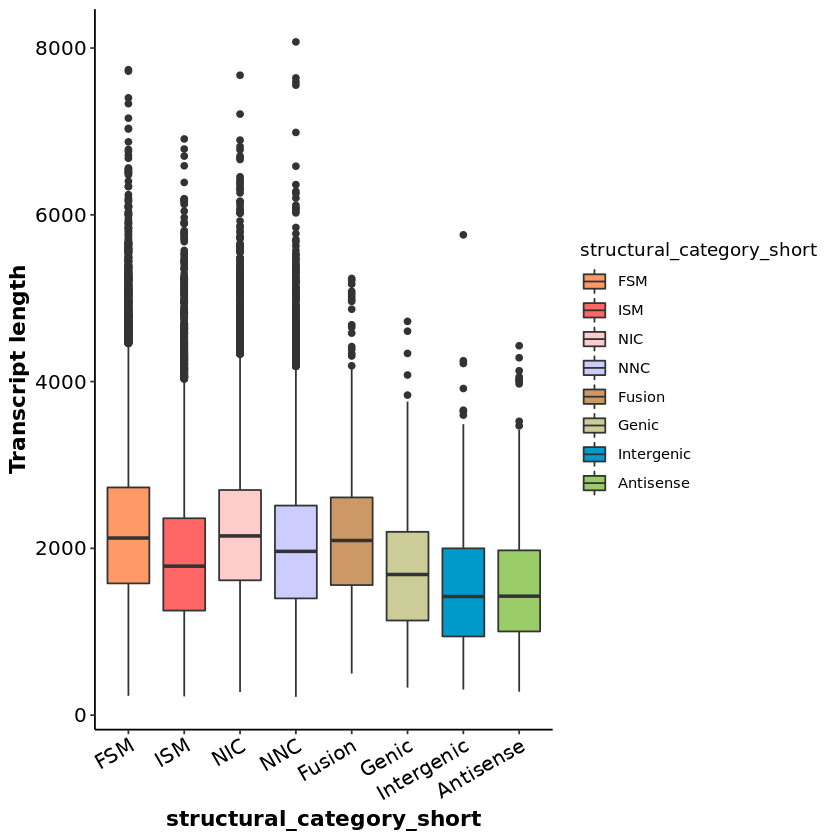

In [45]:
#转录本长度
color_length = c("#FF9966","#FF6666","#FFCCCC","#CCCCFF","#CC9966","#CCCC99","#0099CC","#99CC66")
sample2_df$structural_category_short = factor(sample2_df$structural_category_short,levels = c("FSM","ISM","NIC","NNC","Fusion","Genic","Intergenic","Antisense"))
ggplot(sample2_df,aes(x = structural_category_short,y = length,fill = structural_category_short))+
geom_boxplot()+
scale_fill_manual(values = color_length)+
theme_classic()+
ylab("Transcript length")+
theme(
        axis.text.x=element_text(color = "black", size=12,angle = 30,hjust = 1,vjust=1),
        axis.text.y=element_text(color = "black", size=12),
        axis.title.x=element_text(color = "black", size = 13,face = "bold"),
        axis.title.y=element_text(color = "black", size = 13,face = "bold")
    )->p
#p_file = paste0(outdir,"/bxp.length_sample2.pdf")
#ggsave(p_file,p,width = 7.5,height = 6)
p

Warning message:
“Removed 330 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 298 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


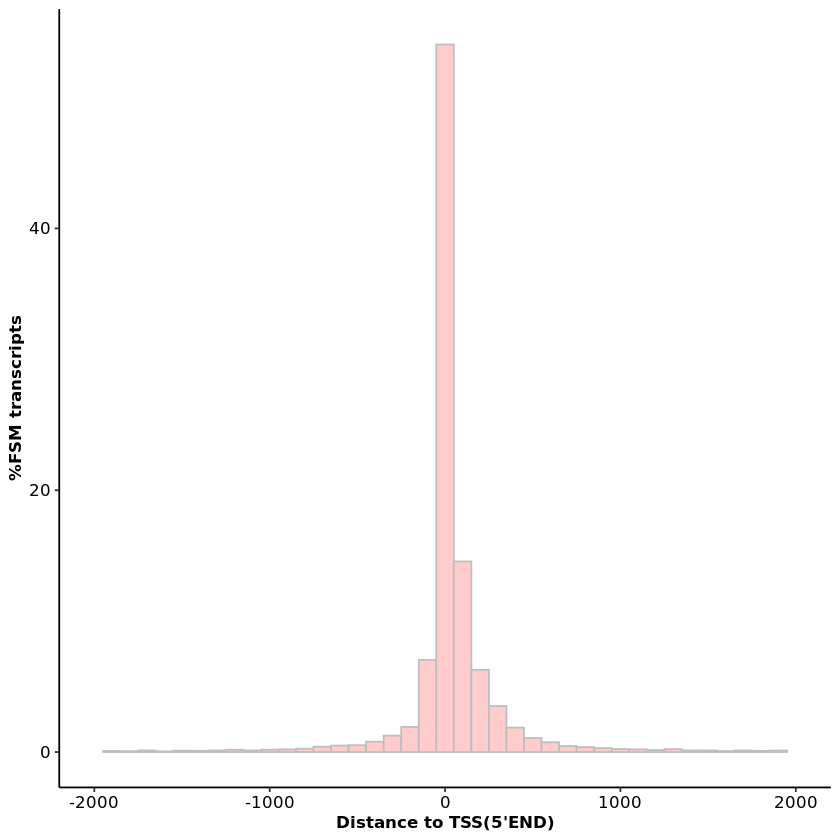

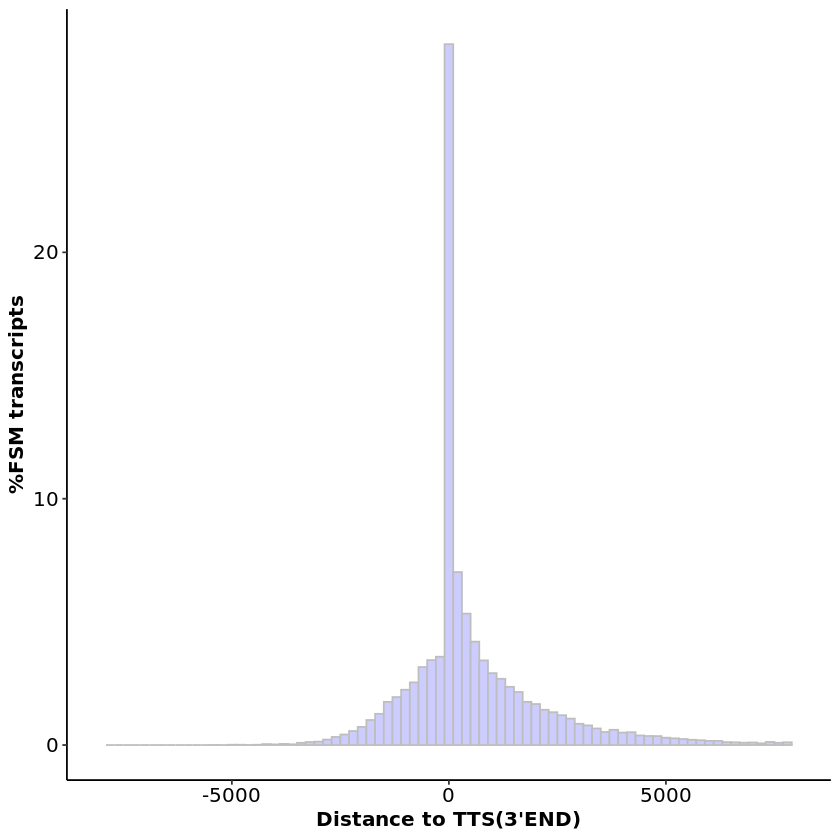

In [46]:
#转录本与TTS，TSS的距离
sample2_df%>%filter(structural_category_short == "FSM")->gdf
ggplot(gdf,aes(x = diff_to_TSS,y=(..count../nrow(gdf))*100))+
geom_histogram(binwidth=100,fill="#FFCCCC",color="#BEBEBE")+
scale_x_continuous(limits = c(-2000,2000))+
theme_classic()+
ylab("%FSM transcripts")+
xlab("Distance to TSS(5'END)")+
theme(
        axis.text.x=element_text(color = "black", size=10),
        axis.text.y=element_text(color = "black", size=10),
        axis.title.x=element_text(color = "black", size = 10,face = "bold"),
        axis.title.y=element_text(color = "black", size = 10,face = "bold")
    )->p1
#p_file = paste0(outdir,"/dis2TSS_sample2.pdf")
#ggsave(p_file,p,width =4, height =4)
p1

sample2_df%>%filter(structural_category_short == "FSM")->gdf
ggplot(gdf,aes(x = diff_to_TTS,y=(..count../nrow(gdf))*100))+
geom_histogram(binwidth=200,fill="#CCCCFF",color="#BEBEBE")+
scale_x_continuous(limits = c(-8000,8000))+
theme_classic()+
ylab("%FSM transcripts")+
xlab("Distance to TTS(3'END)")+
theme(
        axis.text.x=element_text(color = "black", size=12),
        axis.text.y=element_text(color = "black", size=12),
        axis.title.x=element_text(color = "black", size = 12,face = "bold"),
        axis.title.y=element_text(color = "black", size = 12,face = "bold")
    )->p2
#p_file = paste0(outdir,"/dis2TTS_sample2.pdf")
#ggsave(p_file,p,width =5, height =5)
p2

In [12]:
#统计新基因/新转录本
sample1_df%>%mutate(transcript_class = ifelse(associated_transcript == "novel","Novel","Known"),
                   gene_class = ifelse(grepl("novelGene",associated_gene),"Novel","Known"))->sample1_df
sample2_df%>%mutate(transcript_class = ifelse(associated_transcript == "novel","Novel","Known"),
                   gene_class = ifelse(grepl("novelGene",associated_gene),"Novel","Known"))->sample2_df

In [32]:
data.frame(table(sample1_df$transcript_class))->df1
df1%>%mutate(sample = "Sample1")->df1
data.frame(table(sample2_df$transcript_class))->df2
df2%>%mutate(sample = "Sample2")->df2
rbind(df1,df2)->df_t
colnames(df_t)<-c("Transcript","Count","Sample")
df_t$Transcript <- factor(df_t$Transcript,levels=c("Novel","Known"))

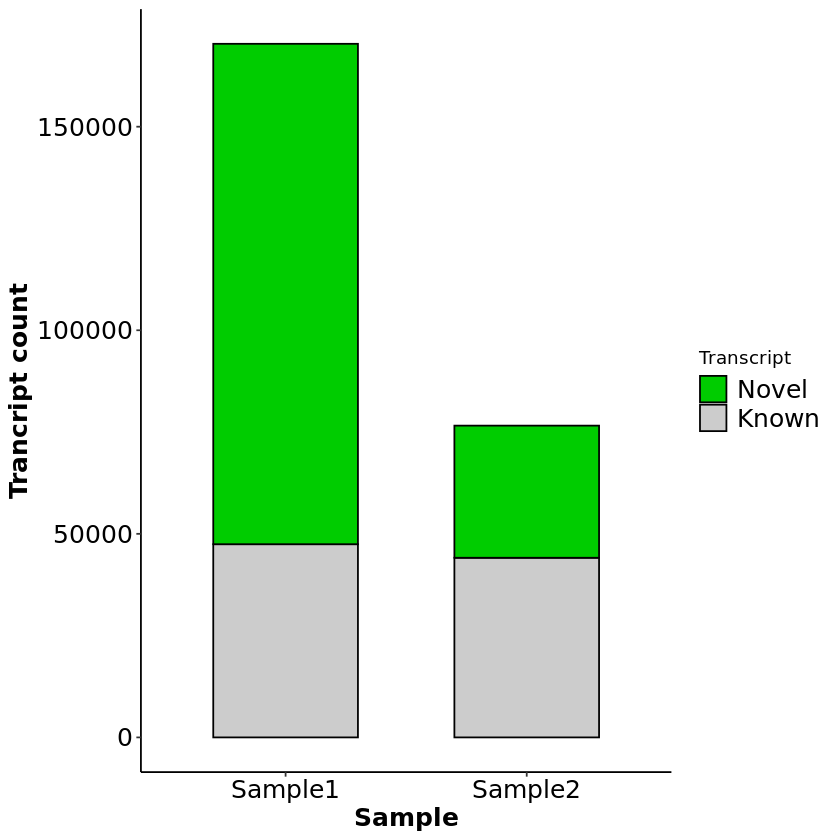

In [47]:

ggplot(df_t,aes(x = Sample,y = Count,fill = Transcript))+
geom_bar(stat = "identity",color = "black",width = 0.6)+
scale_fill_manual(values = c("#00CC00","#CCCCCC"))+
theme_classic()+
ylab("Trancript count")+
theme(
        axis.text.x=element_text(color = "black", size=15),
        axis.text.y=element_text(color = "black", size=15),
        axis.title.x=element_text(color = "black", size = 15,face = "bold"),
        axis.title.y=element_text(color = "black", size = 15,face = "bold"),
        legend.text = element_text(color = "black", size=15)
    )->p3
#p_file = paste0(outdir,"/bar.transcript_novel.pdf")
#ggsave(p_file,p,width = 6)
p3

In [36]:
sample1_df%>%select(associated_gene,gene_class)%>%unique()->sample1_df_1
sample2_df%>%select(associated_gene,gene_class)%>%unique()->sample2_df_1

In [37]:
data.frame(table(sample1_df_1$gene_class))%>%mutate(Sample = "Sample1")->df1
data.frame(table(sample2_df_1$gene_class))%>%mutate(Sample = "Sample2")->df2
rbind(df1,df2)->df_g
colnames(df_g)<-c("Gene","Count","Sample")
df_g$Gene <- factor(df_g$Gene,levels=c("Novel","Known"))

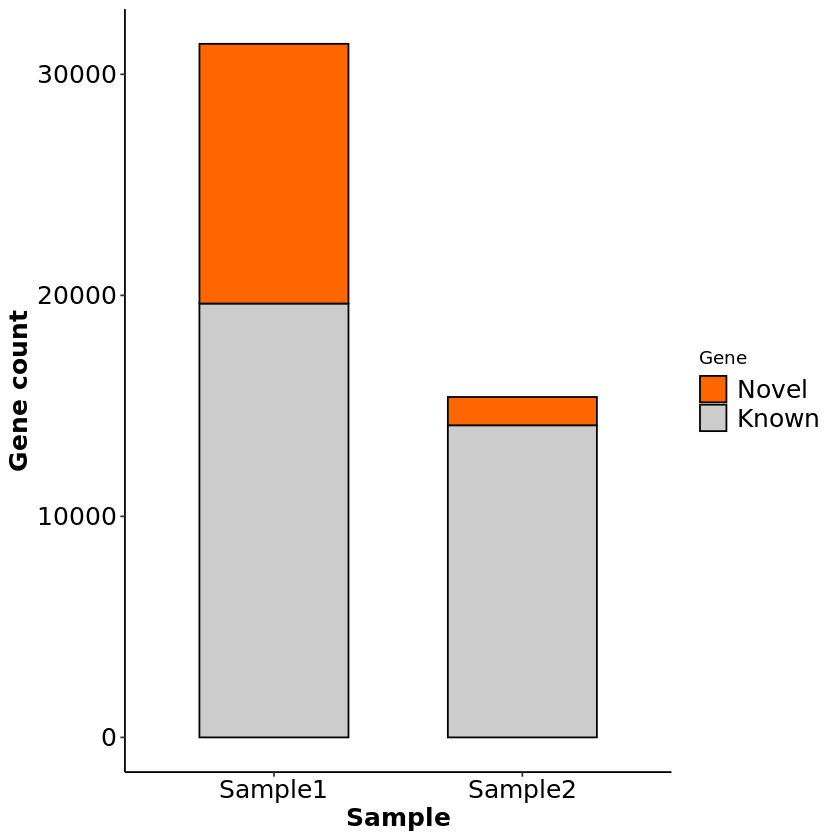

In [48]:

ggplot(df_g,aes(x = Sample,y = Count,fill = Gene))+
geom_bar(stat = "identity",color = "black",width = 0.6)+
scale_fill_manual(values = c("#FF6600","#CCCCCC"))+
theme_classic()+
ylab("Gene count")+
theme(
        axis.text.x=element_text(color = "black", size=15),
        axis.text.y=element_text(color = "black", size=15),
        axis.title.x=element_text(color = "black", size = 15,face = "bold"),
        axis.title.y=element_text(color = "black", size = 15,face = "bold"),
        legend.text = element_text(color = "black", size=15)
    )->p4
#p_file = paste0(outdir,"/bar.gene_novel.pdf")
#ggsave(p_file,p,width = 6)
p4

In [44]:
readr::write_tsv(sample1_df,paste0(outdir,"/sample1.iso.tsv"))
readr::write_tsv(sample2_df,paste0(outdir,"/sample2.iso.tsv"))